Imports

In [46]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

Read Data and Train using Linear Regression

In [47]:

data_x = np.load('Xtrain_Regression1.npy')
data_y = np.load('Ytrain_Regression1.npy')

train_data_x = np.load('Xtrain_Regression1.npy')[0:90]
train_data_y = np.load('Ytrain_Regression1.npy')[0:90]

model = linear_model.LinearRegression()
model.fit(train_data_x, train_data_y)
# model.score(train_data_x, train_data_y)

validate_data_x = np.load('Xtrain_Regression1.npy')[90:, :]
validate_data_y = np.load('Ytrain_Regression1.npy')[90:]

y_hat = model.predict(validate_data_x)

sse = np.sum((y_hat - validate_data_y)**2)
print(sse)
print(model.score(validate_data_x, validate_data_y))
print(model.coef_)

0.14278761998617723
0.9955157693875339
[[ 0.01840077  0.01362033  0.07691005  0.35242787 -0.70933867  1.70099448
   0.07517837  1.82159781 -0.0169392  -0.00213388]]


Ridge Regression

In [48]:
ridge = linear_model.Ridge()
ridge.fit(train_data_x, train_data_y)

y_hat = ridge.predict(validate_data_x)

sse = np.sum((y_hat - validate_data_y)**2)
print(sse)
print(ridge.score(validate_data_x, validate_data_y))
print(ridge.coef_)

0.09087841521634124
0.997145972658099
[[ 2.06851392e-02  7.85282610e-03  7.80191630e-02  3.51168390e-01
  -6.98964799e-01  1.68264518e+00  7.64554275e-02  1.79625661e+00
  -1.30102346e-02 -1.65435052e-03]]


Lasso Regression

In [54]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_data_x, train_data_y)

y_hat[:,0] = lasso.predict(validate_data_x)

sse = np.sum((y_hat - validate_data_y)**2)
print(sse)
print(lasso.score(validate_data_x, validate_data_y))
print(lasso.coef_)

0.1266443914402856
0.9960227458301453
[ 0.         -0.          0.0161444   0.25690233 -0.61535145  1.61241589
  0.          1.69850832 -0.          0.        ]


Test

In [50]:
# test_data_x = np.load('Xtest_Regression1.npy')

# test_data_y = model.predict(test_data_x)

Plot

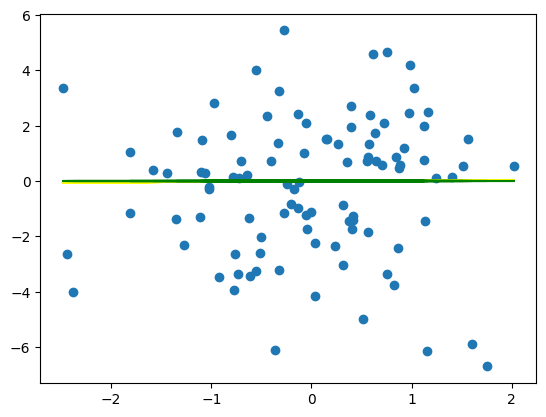

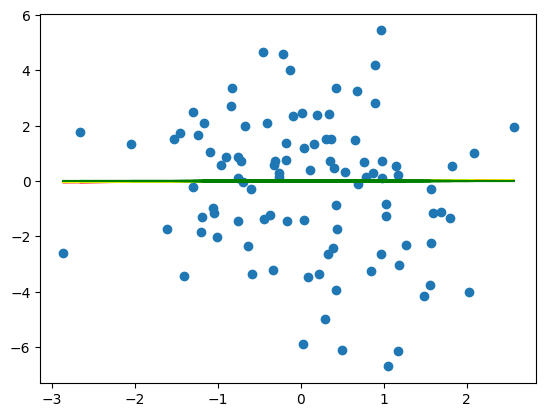

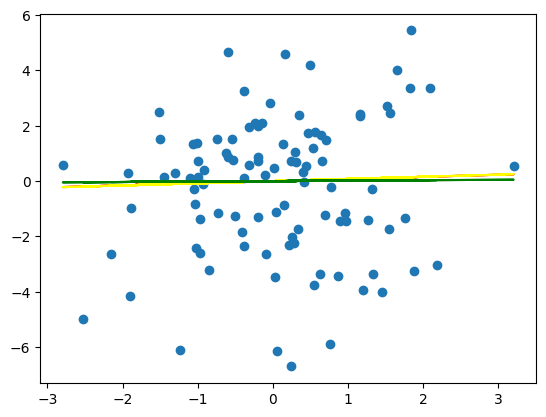

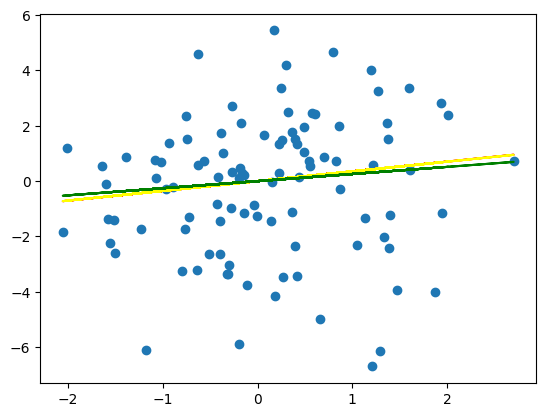

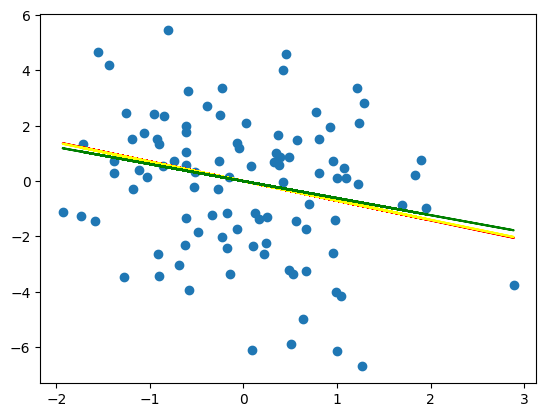

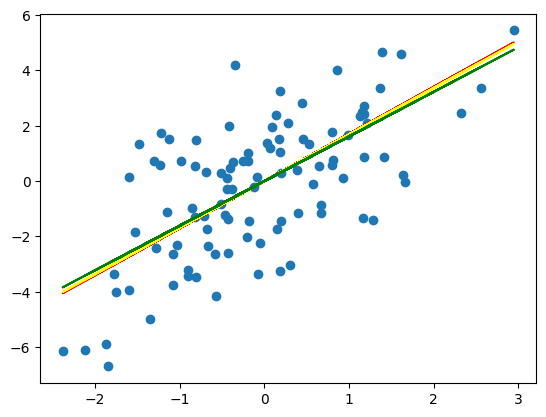

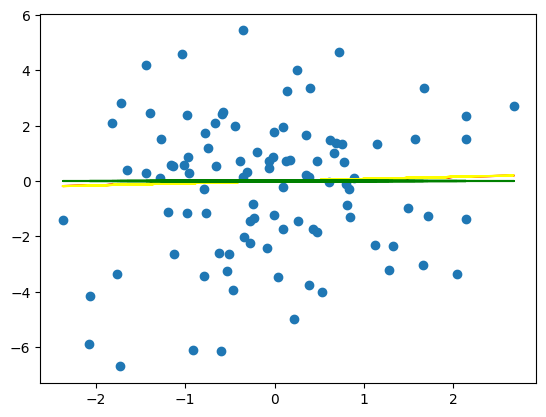

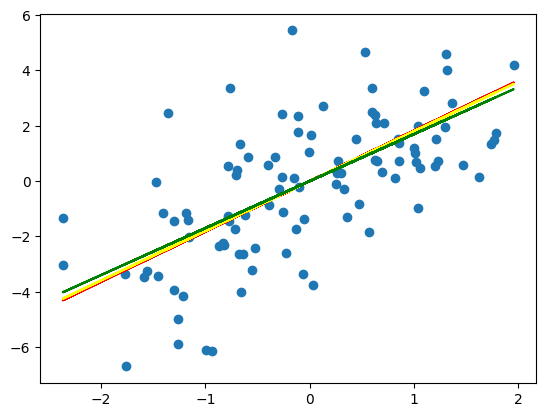

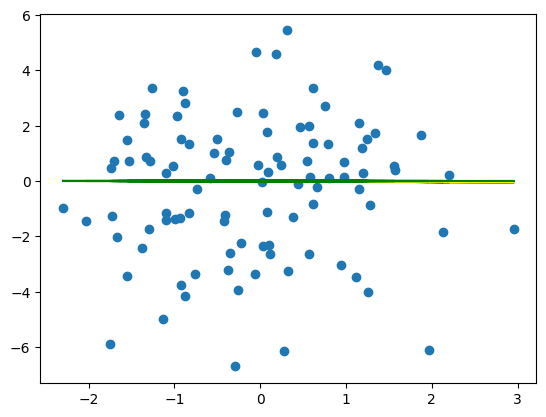

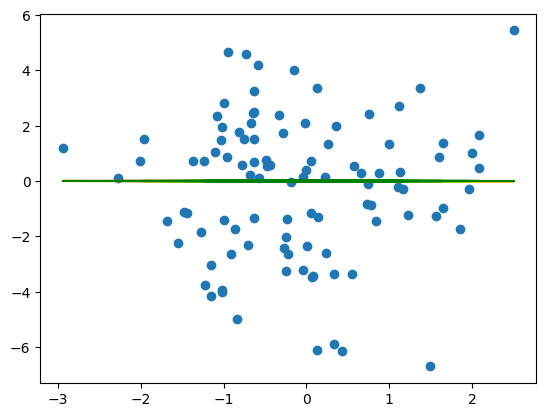

In [55]:
for feature in range(10):
    plt.figure(feature)
    plt.scatter(data_x[:,feature], data_y)  
    plt.plot(data_x[:,feature], data_x[:, feature] * model.coef_[:, feature], color="Red")
    plt.plot(data_x[:,feature], data_x[:, feature] * ridge.coef_[:, feature], color="Yellow")
    plt.plot(data_x[:,feature], data_x[:, feature] * lasso.coef_[feature], color="Green")
    plt.show()